# Testing Matplotlib - Part II :  3D Implicit Surfaces 
Stephane D., November 2022 

version v.2

## Objectives


<span style="color:#4169E1"> Testing Matplotlib capabilities.  <br> Matlab and Octave have easy tools for representing 3D implicit surfaces. 

### 3D Implicit Surfaces


<span style="color:#4169E1"> We test several functions and options in Matplotlib to plot 3D surfaces.
    
<span style="color:#4169E1"> Most 3D Surfaces plotted in this notebook are based on technical report:  <b> "Simple 3-D Visualization of Some Common Mathematical Minimal Surfaces using MATLAB"</b>, by $Nasiha \, Muna^{1}$ and $Albert \, E. \, Patterson^{2}$ <br>
<span style="color:#4169E1">Technical Report · October 2018 <br>

    
<span style="color:#4169E1">1 Department of Physics, Chemistry, and Mathematics, Alabama Agricultural and Mechanical (A \& M)
University, Normal, Alabama, 35762, USA. Email: nasiha.muna@aamu.edu <br>
<span style="color:#4169E1">2 Department of Industrial and Enterprise Systems Engineering, University of Illinois at
Urbana-Champaign, Urbana, Illinois, 61801, USA. Email: pttrsnv2@illinois.edu    


<span style="color:#4169E1"> <i> "The MATLAB code for this work is available at: https://github.com/pttrsnv2/Minimal_ <br>
Surfaces_Visualization_Code. This report and its code are published under a CC-BY 4.0 International license, so it can be used and modified with proper attribution to the authors." </i>

<span style="color:#4169E1"> To plot implicit functions with Matlab, the authors use functions <code>fimplict3.m</code> and <code>fsurf.m</code>. There is no real equivalent in Matplotlib, but an easy method consists of meshing the 3D surfaces with <code>marching_cubes</code>. <br>
<span style="color:#4169E1"> 3D surface implicit equations are in the form: 
<span style="color:#4169E1">  $$F(x,y,z) = 0$$

<span style="color:#4169E1"> with $(x,y,z) \in R^{3}$ <br>
We explore plotting 3D implicit functions with Matplotlib.   

### Table of contents

<span style="color:#4169E1"> 3D Implicit Surfaces <br>

      *   Gyroid
      *   Lidinoid
      *   Schwarz P surface
      *   Schwarz D surface
      *   Tanglecube
      *   Octahedron - Implicit definition

## Import Libraries


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import axes3d
# Import math Library
import math

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
import matplotlib.pyplot as plt

In [50]:
#--------------------------------------------
# Notebook wide presentation
#--------------------------------------------
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#-------  For centering figures 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Plotting 3D Implicit Surfaces


<span style="color:#4169E1">Method for plotting a 3D surface when an implicit equation is available: <br>  
<span style="color:#4169E1"> 
    *   define the 3D surface with a function including the implicit equation <br>
    *   mesh the surface with <code>measure.marching_cubes</code> <br>
    *   plot 3D meshed surface with <code>plot_trisurf</code>

    
    
https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html

<span style="color:#4169E1">From SciKit documentation: <span style="color:#446600"><i>Marching cubes is an algorithm to extract a 2D surface mesh from a 3D volume. This can be conceptualized as a 3D generalization of isolines on topographical or weather maps. It works by iterating across the volume, looking for regions which cross the level of interest. If such regions are found, triangulations are generated and added to an output mesh. The final result is a set of vertices and a set of triangular faces. </i> <br>
<br> 
<span style="color:#4169E1">  In fact,  **marching_cubes is an old meshing algorithm**, and it can works on any 3D surface, including "open" surfaces as we see in this notebook. No need for a volume. <br> You will find more info about marching_cubes in Wikipedia.  https://en.wikipedia.org/wiki/Marching_cubes

### Gyroid

In [80]:
def gyroid(x,y,z):
    return np.sin(x)*np.cos(y) + np.sin(y)*np.cos(z) + np.sin(z)*np.cos(x)

In [91]:
resol=20
t=np.arange(-2*np.pi, 2*np.pi, 2*np.pi/resol, dtype=float)
X, Y, Z = np.meshgrid(t, t, t)

In [92]:
G= gyroid(X,Y,Z)

In [93]:
# Vertices, Faces, Normals, Values

vertsG, facesG, normalsG, valuesG = measure.marching_cubes(G, 0)
vertsG -= 3

from matplotlib.colors import LightSource
from matplotlib import cm
light = LightSource(45, 45)
illuminated_surface = light.shade(verts, cmap=cm.jet)

### Lidinoid

In [94]:
def lidinoid(x,y,z):
    return 0.5*(np.sin(2*x)*np.cos(y)*np.sin(z) + np.sin(2*y)*np.cos(z)*np.sin(x) \
    + np.sin(2*z)*np.cos(x)*np.sin(y)) - 0.5*(np.cos(2*x)*np.cos(2*y) + np.cos(2*y)*np.cos(2*z) \
    + np.cos(2*z)*np.cos(2*x)) + 0.15

In [95]:
#resol=50

u=np.arange(-np.pi, np.pi, np.pi/resol, dtype=float)
v=np.arange(-0.5*np.pi, 1.5*np.pi, np.pi/resol, dtype=float)

X, Y, Z = np.meshgrid(u, u, v)

L = lidinoid(X,Y,Z)

vertsL, facesL, normalsL, valuesL = measure.marching_cubes(L, 0)
vertsL -= 3


###  Schwarz P Surface

In [96]:
def schwarzP(x,y,z):
    return np.cos(x) + np.cos(y) + np.cos(z)

In [97]:
#resol=50
u=np.arange(-3*np.pi, 3*np.pi, 3*np.pi/resol, dtype=float)
X, Y, Z = np.meshgrid(u, u, u)

SP = schwarzP(X,Y,Z)

vertsSP, facesSP, normalSP, valuesSP = measure.marching_cubes(SP, 0)
vertsSP -= 3

### Schwarz D Surface

In [98]:
def schwarzD(x,y,z):
    return np.sin(x)*np.sin(y)*np.sin(z) + np.sin(x)*np.cos(y)*np.cos(z) + np.cos(x)*np.sin(y)*np.cos(z)+np.cos(x)*np.cos(y)*np.sin(z)

In [99]:
#resol=50
t=np.arange(-2*np.pi, 2*np.pi, 2*np.pi/resol, dtype=float)
X, Y, Z = np.meshgrid(t, t, t)

SD = schwarzD(X,Y,Z)

vertsSD, facesSD, normalsSD, valuesSD = measure.marching_cubes(SD, 0)
vertsSD -= 3


### Plotting all implicit surfaces 

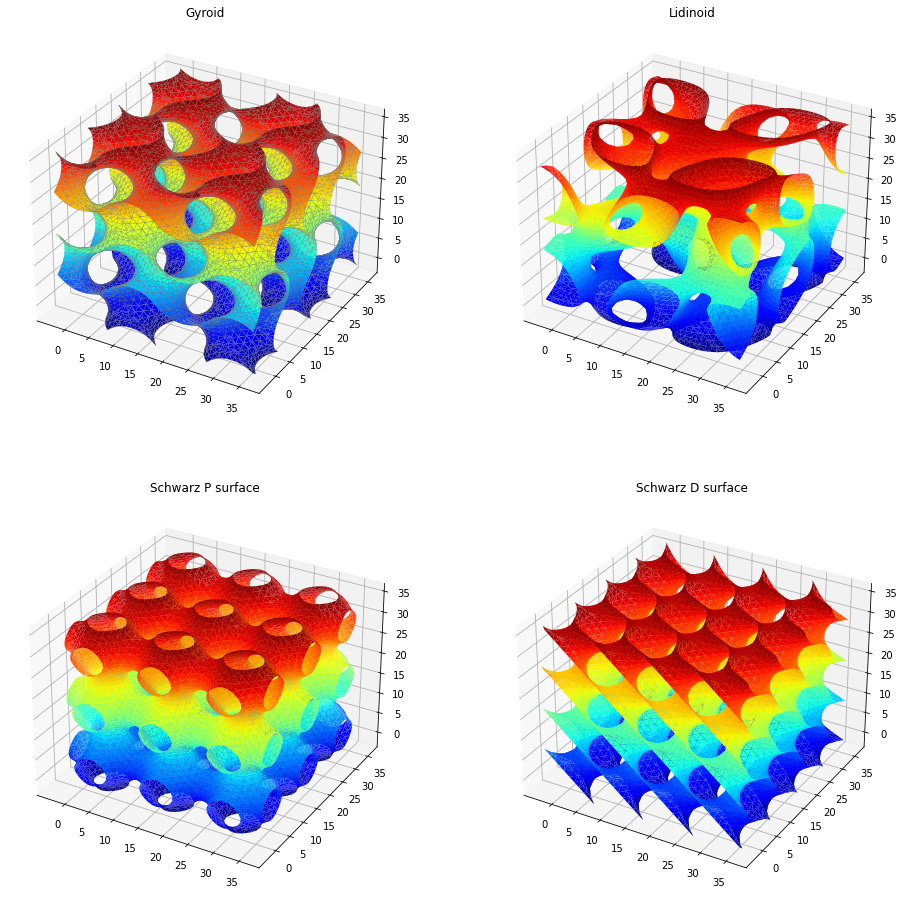

In [100]:
fig=plt.figure(figsize=(16,16))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_trisurf(vertsG[:, 0], vertsG[:, 1], facesG, vertsG[:, 2],
                         cmap = 'jet',
                         linewidth = 0.2,
                         antialiased = True,
                         edgecolor = 'grey') 
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
plt.title('Gyroid')

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot_trisurf(vertsL[:, 0], vertsL[:, 1], facesL, vertsL[:, 2], cmap='jet', lw=0)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
plt.title('Lidinoid')

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot_trisurf(vertsSP[:, 0], vertsSP[:, 1], facesSP, vertsSP[:, 2], cmap='jet', lw=0)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
plt.title('Schwarz P surface')

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.plot_trisurf(vertsSD[:, 0], vertsSD[:, 1], facesSD, vertsSD[:, 2], cmap='jet', lw=0)
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
plt.title('Schwarz D surface')
print('  ')

### Tanglecube 

<span style="color:#4169E1"> A tanglecube is a quartic surface [1] given by the implicit equation:

<span style="color:#4169E1"> $$x^{4}-5x^{2}+y^{4}-5y^{2}+z^{4}-5z^{2}+11.8=0$$ 
    
<span style="color:#4169E1"> The Tanglecube is a particular case of Goursat star surface [2].   

<span style="color:#4169E1">  References:   
[1] https://mathworld.wolfram.com/Tanglecube.html  <br>
[2] https://de.wikipedia.org/wiki/%C3%89douard_Goursat

In [108]:
def tanglecube(x,y,z):
    return x**4+y**4+z**4 -5*(x**2+y**2+z**2)+11.8

In [109]:
xl = np.linspace(-3, 3, 50)
X, Y, Z = np.meshgrid(xl, xl, xl)
FT = tanglecube(X, Y, Z)

In [110]:
vertsT, facesT, normalsT, valuesT = measure.marching_cubes(FT, 0) #, spacing=[np.diff(xl)[0]]*3)
vertsT -= 3

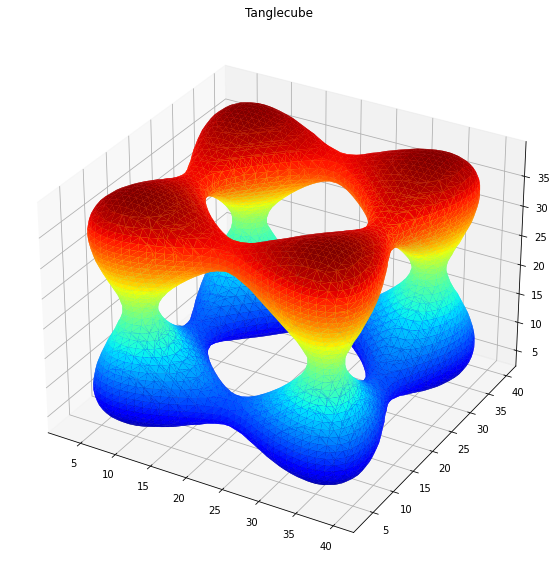

In [111]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
ax.plot_trisurf(vertsT[:, 0], vertsT[:, 1], facesT, vertsT[:, 2], cmap='jet', linewidth=0)

plt.title('Tanglecube')
print(' ')

###  Octahedron - Implicit equation

<span style="color:#4169E1"> Some polyhedrons can be defined with inmplict functions. It's the case with the octahedron. Therefore we can apply the procedure used in the previous section.  

<span style="color:#4169E1">   Octahedron surface implicit equation definition: 
    
<span style="color:#4169E1">  for $r>0$, the surface of an octahedron can be defined with the following implict equation:   

<span style="color:#4169E1">  $$ |x| + |y| + |z| - r =0 $$   

<span style="color:#4169E1"> For a regular octahedron $ -a \le x,y,z \le a$ where $a$ is a positive real.    

In [112]:
def octahedron(x,y,z,r):
    return np.abs(x) + np.abs(y) + np.abs(z) - r

In [113]:
resol=50
a=1
t=np.arange(-a, a, 2*a/resol, dtype=float)
X, Y, Z = np.meshgrid(t, t, t)

In [114]:
R=1
Oc= octahedron(X,Y,Z,R)

In [115]:
vertsO, facesO, normalsO, valuesO = measure.marching_cubes(Oc, 0)
vertsO -= 3

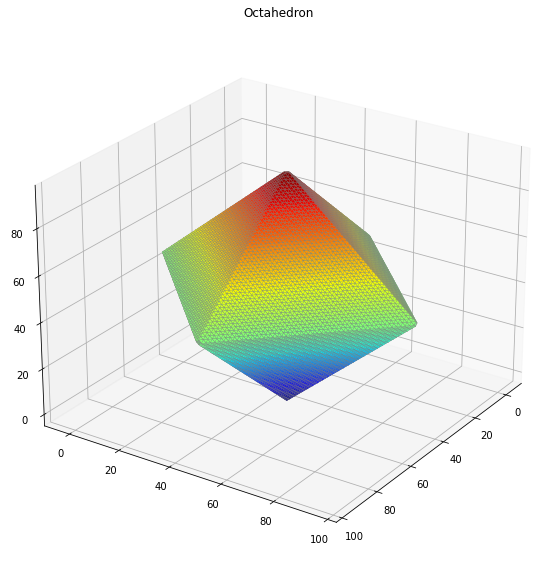

In [116]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot_trisurf(vertsO[:, 0], vertsO[:, 1], facesO, vertsO[:, 2],
                         cmap = 'jet',
                         linewidth = 0.2,
                         antialiased = True,
                         edgecolor = 'grey') 

plt.title('Octahedron')
ax.view_init(elev=25., azim=34)

print(' ')

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2022-11-24        | 0.1     |   Stephane D.   | Initial version                        |
| 2022-11-28        | 0.3     |   Stephane D.   | Completed 4 surfaces in article        |
| 2022-12-01        | 0.5     |   Stephane D.   | Adding Tanglecube and Octahedron       |